In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
import os
os.getcwd()

'/Users/ninazomorrodnia'

In [4]:
#Finding path to file
PATH = '/Users/ninazomorrodnia/Desktop/Bachelorprojekt/Data - may'
genecount_file = PATH + '/gene_count(1) RNAseq all data no comparisons.xlsx'

#Reading in file as excel
df_genecount = pd.read_excel(genecount_file)

In [5]:
os.chdir('/Users/ninazomorrodnia/Desktop')

In [6]:
os.getcwd()

'/Users/ninazomorrodnia/Desktop'

In [7]:
# Select the desired columns
selected_columns = ["gene_id", "Average_W_Starv","Average_W_Fed","Average_HR3_Starv","Average_HR3_Fed","Average_TOR_Starv","Average_TOR_Fed"]

# Create a new DataFrame with only the selected columns
selected_dataset = df_genecount[selected_columns]


# Optionally, you can save the selected dataset to a new CSV file
selected_dataset.to_csv("selected_dataset.csv", index=False)



In [8]:
df_genecount.head()

,gene_id,W_Starv_1,W_Starv_2,W_Starv_3,W_Starv_4,W_Starv_5,Average_W_Starv,SD,N,W_Fed_1,...,N.5,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
0,FBgn0013686,1127648,1478230,1378373,1389676,1212787,1317342.8,142966.342821,5,1121742,...,5,mt:lrRNA,dmel_mitochondrion_genome,12734,14058,-,1325,rRNA,-,-
1,FBgn0002564,1141216,1249636,907392,1072856,962719,1066763.8,137156.094980,5,962227,...,5,Lsp1gamma,3L,66430,68995,+,2501,protein_coding,-,-
2,FBgn0002563,989105,1135483,877297,929489,876867,961648.2,107598.332372,5,891508,...,5,Lsp1beta,2L,898500,901316,+,2749,protein_coding,-,-
3,FBgn0002562,494832,710270,475184,672816,541817,578983.8,106392.954434,5,654120,...,5,Lsp1alpha,X,12490291,12492982,+,2625,protein_coding,-,-
4,FBgn0013674,257936,351046,321561,339584,289409,311907.2,38112.026353,5,249321,...,5,mt:CoI,dmel_mitochondrion_genome,1474,3009,+,1536,protein_coding,-,-


In [9]:
#Defining a function to compare the increase in transcript levels for each experiment
def get_highest_increase(row):
    # get the transcript levels for the three experiments
    wt = row['Average_W_Fed'] - row['Average_W_Starv']
    hr3 = row['Average_HR3_Fed'] - row['Average_HR3_Starv']
    tor = row['Average_TOR_Fed'] - row['Average_TOR_Starv']
    # Finding the experiment with the highest increase
    if wt >= hr3 and wt >= tor:
        return 'wildtype'
    elif hr3 >= wt and hr3 >= tor:
        return 'HR3'
    else:
        return 'TOR'

In [10]:
#Applying the function to each row of the dataset and adding a new column
df_genecount['highest_increase_experiment'] = df_genecount.apply(get_highest_increase, axis=1)
#Passing the axis=1 argument to apply the function row-wise.
#Adding a new column to the dataset named 'highest_increase_experiment' with the results of the get_highest_increase function using the syntax dataframe['column_name'] = values.

In [11]:
df_genecount.head()

,gene_id,W_Starv_1,W_Starv_2,W_Starv_3,W_Starv_4,W_Starv_5,Average_W_Starv,SD,N,W_Fed_1,...,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family,highest_increase_experiment
0,FBgn0013686,1127648,1478230,1378373,1389676,1212787,1317342.8,142966.342821,5,1121742,...,mt:lrRNA,dmel_mitochondrion_genome,12734,14058,-,1325,rRNA,-,-,TOR
1,FBgn0002564,1141216,1249636,907392,1072856,962719,1066763.8,137156.094980,5,962227,...,Lsp1gamma,3L,66430,68995,+,2501,protein_coding,-,-,HR3
2,FBgn0002563,989105,1135483,877297,929489,876867,961648.2,107598.332372,5,891508,...,Lsp1beta,2L,898500,901316,+,2749,protein_coding,-,-,HR3
3,FBgn0002562,494832,710270,475184,672816,541817,578983.8,106392.954434,5,654120,...,Lsp1alpha,X,12490291,12492982,+,2625,protein_coding,-,-,HR3
4,FBgn0013674,257936,351046,321561,339584,289409,311907.2,38112.026353,5,249321,...,mt:CoI,dmel_mitochondrion_genome,1474,3009,+,1536,protein_coding,-,-,HR3


In [21]:
os.getcwd()

'/Users/ninazomorrodnia/Desktop'

In [22]:
os.chdir('/Users/ninazomorrodnia/Desktop')

In [23]:
#Saving the updated dataset to a new CSV file
df_genecount.to_csv('updated_genecount_dataset.csv')

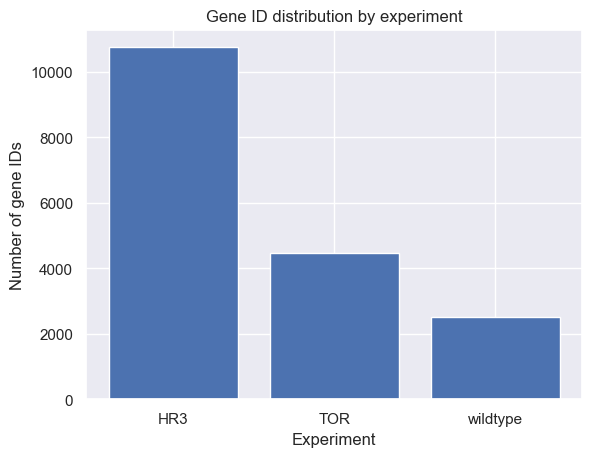

In [25]:
#Now I want to visualize
#Counting the number of gene IDs for each experiment
counts = df_genecount['highest_increase_experiment'].value_counts()

#Creating a bar plot of the counts
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Experiment')
ax.set_ylabel('Number of gene IDs')
ax.set_title('Gene ID distribution by experiment')
plt.show()

In [41]:
# Reading it dataset with only changes fra starved to refed with cholesterol in wildtype
# We have the same path, so we only change the file name.
genecounts_only_WT = PATH + '/W_FedvsW_Starv (only W, in vennDiagram of all conditons compared) With pathway from flybase .xlsx'

#Reading in file as excel
df_genecounts_only_WT = pd.read_excel(genecounts_only_WT)

In [42]:
df_genecounts_only_WT.head()

,gene_id,GO_BIOLOGICAL_PROCESS,GO_MOLECULAR_FUNCTION,NAME,SYMBOL,Below threshold? W starv vs W fed,P value - W starv vs W fed,W_Starv_1,W_Starv_2,W_Starv_3,...,Percent change.2,gene_name,gene_chr,gene_start,gene_end,gene_strand,gene_length,gene_biotype,gene_description,tf_family
0,FBgn0000639,biological_process ; GO:0008150 | involved_in ...,molecular_function ; GO:0003674 | enables no b...,Fat body protein 1,Fbp1,No,0.259900,1.747661,0.481245,0.307203,...,35.577198,Fbp1,3L,14094589,14098053,-,3465,protein_coding,-,-
1,novel.109,NaN,NaN,NaN,NaN,Yes,0.043870,0.054876,0.000000,0.000000,...,-15.481550,-,3R,15618785,15626477,+,677,-,- && - && -,-
2,FBgn0003372,puparial adhesion ; GO:0007594 | involved_in i...,extracellular matrix structural constituent ; ...,Salivary gland secretion 1,Sgs1,No,0.144921,0.000000,0.007538,0.000000,...,64.971940,Sgs1,2L,4937409,4941423,+,3950,protein_coding,-,-
3,FBgn0083007,-,-,snoRNA:Psi28S-1135f,snoRNA:Psi28S-1135f,No,0.051365,0.000000,0.000000,0.000000,...,53.858677,snoRNA:Psi28S-1135f,X,17145384,17145534,-,151,snoRNA,-,-
4,FBgn0264375,-,-,long non-coding RNA:CR43827,lncRNA:CR43827,Yes,0.022387,0.068043,0.000000,0.000000,...,156.112399,CR43827,2L,19922964,19923574,+,546,lincRNA,-,-


In [45]:
# Filtering the dataset to keep only significant gene IDs (p-value > 0.05)
significant_genes = df_genecounts_only_WT[df_genecounts_only_WT['P value - W starv vs W fed '] > 0.05]

In [48]:
os.getcwd()

'/Users/ninazomorrodnia/Desktop'

In [46]:
# Saving the filtered dataset to a new CSV file
significant_genes.to_csv('significant_genes.csv', index=False)